<img src = "https://universidadean.edu.co/sites/default/files/noticias/galeria/Logo-Universidad-Ean-fondo-negro-Galeria_1.jpg" alt = "Encabezado MLDS" width = "30%">  </img>


# **Entendimiento de los datos**
---

El desarrollo de las actividades de esta guía le permitirá poner en práctica herramientas de organización y visualización de datos. A través de la construcción de diferentes gráficas y el cálculo de medidas descriptivas como la media, la mediana, la moda, la varianza y la desviación estándar, será posible obtener una visión general de las características principales de los datos, permitiendo identificar patrones y tendencias.

Se trabajará sobre la base de datos *Titanic*, que contiene datos relacionados con los pasajeros y tripulantes a bordo del RMS Titanic, un transatlántico británico que naufragó en el año 1912.


| Variable | Definición	| Valores |
| --- | --- | --- |
| survived \| alive | 	Sobreviviente  | 	[0\|no] = No, [1\|yes] = Sí |
| pclass \| class	| Clase del tiquete | 	1 = [1\|First], 2 = [2\|Second], 3 = [3\|Third]
| sex 	| Sexo 	| 'male', 'female' |
| Age |	Edad en años 	| |
| sibsp |	Número de hermanos / cónyuge abordo del Titanic 	| |
| parch |	Número de padres / hijos abordo del Titanic 	| |
| fare 	| Costo del ticket | |
| embarked |	Puerto de embarque |	C = Cherbourg, Q = Queenstown, S = Southampton |
| who |	Si es hombre, mujer o niño. | 'man', 'woman', 'child'  |
| adult_male 	| Si es un hombre mayor de edad. | True, False	|
| deck |	Identificación de la cubierta/cabina.| 'A', 'B', 'C', 'D', 'E', 'F', 'G' |
| alone |	Si había embarcado solo.| True, False |

Ejecute la siguiente celda para importar las librerías necesarias. Si se requiere de librerías adicionales puede anexarlas a la celda.

In [1]:
# Importar librerías (EJECUTE ESTA CELDA)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#VERIFICACIÓN DE VERSIONES
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Seaborn', sns.__version__)
print('Matplotlib', mpl.__version__)

Python 3.12.4
Pandas 2.2.2
NumPy 1.26.4
Seaborn 0.13.2
Matplotlib 3.8.4


Este material fue realizado con las siguientes versiones:

- Python 3.10.12

- Pandas: 2.0.3

- Numpy: 1.25.2

- Seaborn: 0.13.1

- Matplotlib: 3.7.1

Para cargar los datos ejecute la siguiente celda.

In [4]:
#df1 = sns.load_dataset('titanic', data_home='./')
df1 = sns.load_dataset("titanic")
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Nombres de los integrantes del grupo (Completar)**

## ⚛️**1. Entendimiento de los datos**
---
> Haga una exploración de las variables con el método **`.info()`**.   
En esta parte se requiere hacer una revisión de la base de datos donde se muestre entre otras cosas:  

1.  Número total de variables que contiene la base de datos.  

2. Escribir las variables que tienen datos faltantes, además, proporcionar el porcentaje total de valores faltantes en la base de datos.
3. Clasificar las variables en cualitativas y numéricas.  

4. Consultar y proponer una metodología de *imputación* de datos para la variable *age*, indique la conveniencia o no de aplicar una metodología de este tipo.  

**`Nota:`** Sobre el punto 4, no es necesario relizar el proceso de imputación, solo explicar la propuesta de imputación.


## **✅ Exploración de los datos**

### **⭕️ Introducción a la Fase de Exploración de Datos**

En esta fase inicial del análisis de datos, se realiza una exploración preliminar del conjunto de datos para comprender su estructura y características básicas. Esta etapa es crucial para identificar los aspectos fundamentales del dataset y preparar el terreno para un análisis más profundo.

Durante la exploración, se utilizan diversas instrucciones para obtener una visión general del conjunto de datos:

- **`df1.info()`**: Proporciona un resumen conciso de la información del DataFrame, incluyendo el número de entradas no nulas y los tipos de datos de cada columna.
- **`print(df1.shape)`**: Muestra las dimensiones del DataFrame, es decir, el número de filas y columnas.
- **`print(df1.head())`**: Muestra las primeras filas del DataFrame, facilitando una vista rápida de los datos.
- **`print(df1.tail())`**: Muestra las últimas filas del DataFrame, útil para verificar el final del dataset.
- **`print(total_size)`**: Indica el tamaño total del DataFrame en términos de número de filas.
- **`print(df1.shape)`**: Indica la dimensión del Dataframe (filas, columnas).
- **`print(df1.memory_usage(deep=True))`**: Proporciona el uso de memoria por columna, permitiendo identificar el consumo de recursos.
- **`print(df1.columns)`**: Lista los nombres de todas las columnas en el DataFrame.

Estas instrucciones ofrecen una visión general del conjunto de datos, ayudando a detectar posibles problemas como datos faltantes, tipos de datos incorrectos o inconsistencias. Esta exploración es un primer paso esencial para un análisis de datos eficaz.

#### **⭕️ Información general del DataFrame**

In [5]:
# Información de Dataframe
print("Información general del DataFrame:\n")
df1.info()

Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### **⭕️ Diccionario de datos**

De acuerdo a la información anterior se construye un diccionario de datos.

Este diccionario de datos proporciona una descripción detallada de las columnas contenidas en el archivo `titanic.csv`, que contiene información sobre los pasajeros del Titanic. Cada columna se detalla con su tipo de dato (`Dtype`), una breve descripción del tipo de dato (`Descripción Dtype`), el tamaño en bytes ocupado por el tipo de dato (`Tamaño en Bytes`), y una descripción de los datos representados en esa columna.

El propósito de este diccionario es facilitar la comprensión de la estructura del conjunto de datos y ayudar en el análisis y la manipulación de la información.

A continuación, se presenta una tabla con la información relevante para cada columna:

**Descripción de las Columnas en** `titanic.csv`

| Column        | Dtype    | Descripción Dtype                      | Tamaño en Bytes | Descripción                                                                                                                                                   |
|---------------|----------|----------------------------------------|-----------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `survived`    | int64    | Entero de 64 bits                      | 8 bytes         | Indica si el pasajero sobrevivió (1) o no (0).                                                                                                                 |
| `pclass`      | int64    | Entero de 64 bits                      | 8 bytes         | Clase del billete del pasajero (1, 2, o 3).                                                                                                                    |
| `sex`         | object   | Texto (variable tamaño)                | Variable        | Sexo del pasajero (masculino o femenino).                                                                                                                       |
| `age`         | float64  | Flotante de 64 bits                    | 8 bytes         | Edad del pasajero en años. Algunos valores están faltantes.                                                                                                    |
| `sibsp`       | int64    | Entero de 64 bits                      | 8 bytes         | Número de hermanos o cónyuges a bordo.                                                                                                                         |
| `parch`       | int64    | Entero de 64 bits                      | 8 bytes         | Número de padres o hijos a bordo.                                                                                                                               |
| `fare`        | float64  | Flotante de 64 bits                    | 8 bytes         | Tarifa pagada por el billete.                                                                                                                                   |
| `embarked`    | object   | Texto (variable tamaño)                | Variable        | Puerto de embarque del pasajero (C = Cherbourg; Q = Queenstown; S = Southampton).                                                                               |
| `class`       | category | Categoría con tamaño optimizado        | Variable        | Clase del pasajero en forma de categoría (1, 2, o 3).                                                                                                          |
| `who`         | object   | Texto (variable tamaño)                | Variable        | Descripción del pasajero como "man", "woman" o "child".                                                                                                        |
| `adult_male`  | bool     | Booleano (1 bit, 1 byte)               | 1 byte          | Indica si el pasajero es un adulto masculino (True) o no (False).                                                                                             |
| `deck`        | category | Categoría con tamaño optimizado        | Variable        | Deck del barco en el que viajaba el pasajero. Algunos valores están faltantes.                                                                               |
| `embark_town` | object   | Texto (variable tamaño)                | Variable        | Ciudad donde el pasajero embarcó (Cherbourg, Queenstown, o Southampton).                                                                                      |
| `alive`       | object   | Texto (variable tamaño)                | Variable        | Indica si el pasajero está vivo (Yes) o muerto (No).                                                                                                           |
| `alone`       | bool     | Booleano (1 bit, 1 byte)               | 1 byte          | Indica si el pasajero viajaba solo (True) o acompañado (False).                                                                                              |

#### **⭕️ Primeras filas del DataFrame**

In [6]:
# Primeros registros
print(df1.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


#### **⭕️ Últimas filas del DataFrame**

In [7]:
# ultimos registros
print(df1.tail())

     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  


#### **⭕️ Tamaño total del DataFrame en términos de número de filas**

In [8]:
# total de registros
total_size = len(df1)
print(f'Tamaño (Número de Filas): {total_size}')

Tamaño (Número de Filas): 891


#### **⭕️ Dimensión del Dataframe (Filas x Columnas)**

In [9]:
# dimensión del conjunto de datos (filas, columnas)
print("\nDimensión del conjunto de datos (filas, columnas):")
print(df1.shape)


Dimensión del conjunto de datos (filas, columnas):
(891, 15)


#### **⭕️ Uso de memoria por columna**

In [10]:
# mostrar el tamaño de la memoria utilizada por el DataFrame
print("Memoria utilizada por el DataFrame (bytes):\n")
print(df1.memory_usage(deep=True))

Memoria utilizada por el DataFrame (bytes):

Index            132
survived        7128
pclass          7128
sex            47851
age             7128
sibsp           7128
parch           7128
fare            7128
embarked       44514
class           1162
who            47040
adult_male       891
deck            1541
embark_town    52991
alive          45783
alone            891
dtype: int64


#### **⭕️ Columnas (Variables) en Dataframe**

In [11]:
# nombres de las columnas
print("\nNombres de las columnas:")
print(df1.columns)


Nombres de las columnas:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


:## **✅ 1. Número Total de Variables**

In [12]:
# Número total de variables que contiene la base de datos.
num_columnas = df1.shape[1]
print(f'Número de variables (columnas): {num_columnas}')

Número de variables (columnas): 15


⭕️ En el conjunto de datos `titanic.csv`, se identifican un total de **15 variables**. Estas variables abarcan una variedad de tipos de datos y proporcionan información diversa sobre los pasajeros del Titanic.

La cantidad de variables en el dataset refleja la riqueza de la información disponible y es fundamental para realizar un análisis exhaustivo.



#### **📅 Número de Variables en el Dataset**

| Descripción                  | Cantidad |
|------------------------------|----------|
| Total de Variables en el Dataset | 15       |



## **✅ 2. Variables con datos faltantes, Porcentaje total de valores faltantes en la base de datos.**

In [13]:
import json

# Escribir las variables que tienen datos faltantes, además, proporcionar el porcentaje total de valores faltantes en la base de datos.
# Paso 1: Encontrar columnas con valores faltantes
faltantes_por_columna = df1.isnull().sum()

# Paso 2: Filtrar columnas que tienen valores faltantes
data1 = faltantes_por_columna[faltantes_por_columna > 0]
variables_con_faltantes = data1.to_dict()

print('\nCant. valores faltantes por columna:',
      json.dumps(variables_con_faltantes, indent=4),
      sep="\n")

# Paso 3: Calcular el porcentaje de valores faltantes por columna
data = (data1 / len(df1)) * 100
data = data.to_dict()
porcentaje_faltantes_por_columna = {key: f'{value:.2f}%' for key, value in data.items()}

# Paso 4: Calcular el porcentaje total de valores faltantes en el DataFrame
porcentaje_total_faltantes = (df1.isnull().sum().sum() / df1.size) * 100
porcentaje_total_no_faltantes = (df1.notnull().sum().sum() / df1.size) * 100

# Resultados
print('\n% valores faltantes por columna:', f'{json.dumps(porcentaje_faltantes_por_columna, indent=4)}', sep="\n")

print(f"\nPorcentaje total de valores faltantes en la base de datos: {porcentaje_total_faltantes:.2f}%")
print(f"Porcentaje total de valores en la base de datos: {porcentaje_total_no_faltantes:.2f}%")


Cant. valores faltantes por columna:
{
    "age": 177,
    "embarked": 2,
    "deck": 688,
    "embark_town": 2
}

% valores faltantes por columna:
{
    "age": "19.87%",
    "embarked": "0.22%",
    "deck": "77.22%",
    "embark_town": "0.22%"
}

Porcentaje total de valores faltantes en la base de datos: 6.50%
Porcentaje total de valores en la base de datos: 93.50%


### **⭕️ Información de Valores Faltantes**

En el análisis del conjunto de datos, es crucial identificar y comprender los valores faltantes para asegurar una interpretación precisa y una manipulación adecuada de los datos. A continuación, se presenta un resumen detallado de los valores faltantes en el dataset `titanic.csv`.

1. **Cantidad de Valores Faltantes por Columna**: Esta tabla muestra el número total de valores faltantes en cada columna del dataset. Identificar estas columnas permite priorizar las técnicas de imputación y decidir cómo manejar los datos faltantes.

2. **Porcentaje de Valores Faltantes por Columna**: Aquí se detalla el porcentaje de valores faltantes respecto al total de datos en cada columna. Este porcentaje proporciona una visión clara del impacto de los valores faltantes en cada variable y ayuda a evaluar la gravedad del problema.

3. **Porcentaje Total de Valores Faltantes en la Base de Datos**: Esta tabla resume el porcentaje total de valores faltantes en el conjunto de datos en comparación con el total de datos disponibles. Esto ayuda a entender la magnitud del problema a nivel global.

4. **Porcentaje Total de Valores en la Base de Datos**: Presenta el porcentaje total de valores presentes en el dataset, brindando una perspectiva complementaria sobre la integridad de los datos.

Estas métricas son esenciales para tomar decisiones informadas sobre el tratamiento de los datos faltantes y para garantizar la calidad del análisis subsecuente.


#### **📅 Cantidad de Valores Faltantes por Columna**

| Columna        | Cantidad de Valores Faltantes |
|----------------|-------------------------------|
| `age`          | 177                           |
| `embarked`     | 2                             |
| `deck`         | 688                           |
| `embark_town`  | 2                             |

---

#### **📅 Porcentaje de Valores Faltantes por Columna**

| Columna        | % Valores Faltantes |
|----------------|---------------------|
| `age`          | 19.87%              |
| `embarked`     | 0.22%               |
| `deck`         | 77.22%              |
| `embark_town`  | 0.22%               |

---

#### **📅 Porcentaje Total de Valores Faltantes en la Base de Datos**

| Descripción                                | Porcentaje |
|--------------------------------------------|------------|
| Total de Valores Faltantes                 | 6.50%      |
| Total de Valores No Faltantes (completos)  | 93.50%     |

---

#### **📅 Porcentaje Total de Valores en la Base de Datos**

| Descripción                                | Porcentaje |
|--------------------------------------------|------------|
| Porcentaje Total de Valores en la Base     | 100.00%    |



## **✅ 3. Clasificación de variables en cualitativas y numéricas.**

In [14]:
# Clasificar las variables numéricas y cualitativas en un DataFrame
variables_numericas = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()
variables_cualitativas = df1.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("Variables numéricas:", variables_numericas, sep="\n")
print("Variables cualitativas:", variables_cualitativas, sep="\n")

Variables numéricas:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Variables cualitativas:
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


### **⭕️ Tipos de Variables del Dataset**

En el análisis del conjunto de datos `titanic.csv`, es fundamental clasificar las variables en numéricas y cualitativas para entender mejor la estructura de los datos y realizar un análisis adecuado. A continuación se presenta la clasificación de las variables:


### **📅 Variables Numéricas**

| Variable | Descripción                             |
|----------|-----------------------------------------|
| `survived` | Indicador de supervivencia (0 o 1)      |
| `pclass`   | Clase del billete (1, 2 o 3)            |
| `age`      | Edad del pasajero en años               |
| `sibsp`    | Número de hermanos o cónyuges a bordo   |
| `parch`    | Número de padres o hijos a bordo        |
| `fare`     | Tarifa pagada por el billete            |

---

### **📅 Variables Cualitativas**

| Variable       | Descripción                                      |
|----------------|--------------------------------------------------|
| `sex`          | Sexo del pasajero (masculino o femenino)        |
| `embarked`     | Puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton) |
| `class`        | Clase del pasajero en forma de categoría        |
| `who`          | Descripción del pasajero ("man", "woman" o "child") |
| `adult_male`   | Indica si el pasajero es un adulto masculino (True o False) |
| `deck`         | Deck del barco en el que viajaba el pasajero    |
| `embark_town`  | Ciudad donde el pasajero embarcó (Cherbourg, Queenstown, o Southampton) |
| `alive`        | Indica si el pasajero está vivo (Yes) o muerto (No) |
| `alone`        | Indica si el pasajero viajaba solo (True) o acompañado (False) |

## **✅ 4. Metodología de Imputación de datos para variable `age`**

⭕️ La imputación de datos es el proceso de reemplazar los valores faltantes en un conjunto de datos.

Para la variable `age` del DataFrame, hay varias metodologías de imputación que puedes considerar, por ejemplo:

| Tipo Imputación           | Conveniencia                                                                                                                                                                                                      |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Media                     | Es aproximadamente simétrica y no tiene valores atípicos significativos. Sin embargo, puede ser sensible a los valores atípicos.                                                                                  |
| Mediana                   | Generalmente preferida cuando la variable tiene una distribución sesgada o contiene valores atípicos, ya que es menos sensible a ellos.                                                                           |
| Moda                      | Puede ser útil si hay una edad que ocurre con mucha frecuencia y es representativa de la mayoría.                                                                                                                 |
| Regresión                 | Tiene una fuerte relación con otras variables en el conjunto de datos. Sin embargo, puede ser más complejo y es susceptible a la calidad del modelo de regresión.                                                 |
| K-Nearest Neighbors (KNN) | Puede ser efectiva si la variable está correlacionada con otras variables en el DataFrame y se desea una imputación basada en similitudes. Es más compleja y puede ser más lenta para grandes conjuntos de datos. |


La elección de la metodología depende de la naturaleza de los datos y el impacto potencial en el análisis o modelo.

Para este ejemplo se explorara imputación por media, mediana y algoritmo de k vecinos más cercanos y se evaluara con Simetria y Curtosis cual seria la metodología de imputación mas recomendada.

Para tener en cuenta:

**✔️Asimetría:** Mide el grado de inclinación o sesgo de la distribución de datos. Una asimetría de 0 indica una distribución simétrica. Valores positivos indican una inclinación hacia la derecha (cola larga a la derecha), y valores negativos indican una inclinación hacia la izquierda (cola larga a la izquierda).

**✔️Curtosis:** Mide la altura y el ancho de las colas de la distribución en comparación con una distribución normal. Curtosis alta indica colas más pesadas y un pico más alto, mientras que curtosis baja indica colas más ligeras y un pico más plano.

In [18]:
# Prueba de Simetria y Curtosis
from scipy.stats import skew, kurtosis

# Función para calcular asimetría y curtosis
def asimetria_curtosis(df, key, type):
  age_skew = skew(df[key].dropna())
  age_kurtosis = kurtosis(df[key].dropna())
  print(f"\nImputación por {type}:")
  print(f"Asimetría : {age_skew:.2f}")
  print(f"Curtosis: {age_kurtosis:.2f}")

In [28]:
import warnings
warnings.filterwarnings("ignore")
# Imputación por Media
df_media = sns.load_dataset("titanic")
age_media = df_media['age'].mean()
df_media['age'].fillna(age_media, inplace=True)

values = df_media['age'].unique()
print(f'Media: {age_media}')
print(f'Cantidad de Valores: { str(len(values)) }')
print(f'Valores: {sorted(values)}')

asimetria_curtosis(df_media, 'age', 'Media')

Media: 29.69911764705882
Cantidad de Valores: 89
Valores: [0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 29.69911764705882, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]

Imputación por Media:
Asimetría : 0.43
Curtosis: 0.95


In [29]:
# Imputación por Mediana
df_mediana = sns.load_dataset("titanic")
age_mediana = df_mediana['age'].median()
df_mediana['age'].fillna(age_mediana, inplace=True)

values = df_mediana['age'].unique()
print(f'Mediana: {age_mediana}')
print(f'Cantidad de Valores: { str(len(values)) }')
print(f'Valores: {sorted(values)}')

asimetria_curtosis(df_mediana, 'age', 'Mediana')

Mediana: 28.0
Cantidad de Valores: 88
Valores: [0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]

Imputación por Mediana:
Asimetría : 0.51
Curtosis: 0.98


In [30]:
#Imputación por K-Nearest Neighbors (KNN)

from sklearn.impute import KNNImputer
df_knn = sns.load_dataset("titanic")

imputer = KNNImputer(n_neighbors=5)
df_knn[['age']] = imputer.fit_transform(df_knn[['age']])

values = df_knn['age'].unique()
print(f'\nK-Nearest Neighbors (KNN):')
print(f'Cantidad de Valores: { str(len(values)) }')
print(f'Valores: {sorted(values)}')

asimetria_curtosis(df_knn, 'age', 'KNN')


K-Nearest Neighbors (KNN):
Cantidad de Valores: 89
Valores: [0.42, 0.67, 0.75, 0.83, 0.92, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 14.5, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.5, 21.0, 22.0, 23.0, 23.5, 24.0, 24.5, 25.0, 26.0, 27.0, 28.0, 28.5, 29.0, 29.69911764705882, 30.0, 30.5, 31.0, 32.0, 32.5, 33.0, 34.0, 34.5, 35.0, 36.0, 36.5, 37.0, 38.0, 39.0, 40.0, 40.5, 41.0, 42.0, 43.0, 44.0, 45.0, 45.5, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 55.5, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.0, 70.5, 71.0, 74.0, 80.0]

Imputación por KNN:
Asimetría : 0.43
Curtosis: 0.95


###📅 **Comparación de Métodos de Imputación**

| Método de Imputación | Asimetría (Skewness) | Curtosis  |
|----------------------|-----------------------|-----------|
| Imputación por Media | 0.43                  | 0.95      |
| Imputación por Mediana | 0.51                  | 0.98      |
| Imputación por KNN   | 0.43                  | 0.95      |


🟢 *De acuerdo con la tabla, la imputación por Media y la imputación por KNN muestran el menor sesgo*. Ambos métodos tienen:

**✔️Asimetría (0.43):** Este valor es menor en comparación con la imputación por Mediana (0.51), indicando que las distribuciones imputadas con estos métodos tienen una asimetría más cercana a la simetría. Esto sugiere que los datos imputados son menos sesgados y más equilibrados en torno a la media.

**✔️Curtosis (0.95):** La curtosis para ambos métodos es menor que la de la imputación por Mediana (0.98). Esto significa que la distribución de los datos imputados es menos picuda y tiene colas menos largas en comparación con la imputación por Mediana.

## **⚛️2. Distribución de la tarifa**
---

1. Represente gráficamente la distribución de la tarifa del tiquete de ingreso de los pasajeros a bordo del *Titanic* por medio de un **histograma**.
2. Realice un análisis del histograma obtenido haciendo comentarios sobre la forma, dispersión de los datos y existencia de datos atípicos.

**`Nota:`** Tenga en cuenta que la gráfica debe tener como mínimo los siguientes elementos:  
- Título o encabezado
- Figura o gráfica
- Fuente de los datos
- Leyendas (si se requiere)  


## **✅ 1. Representación grafica (Histograma)**

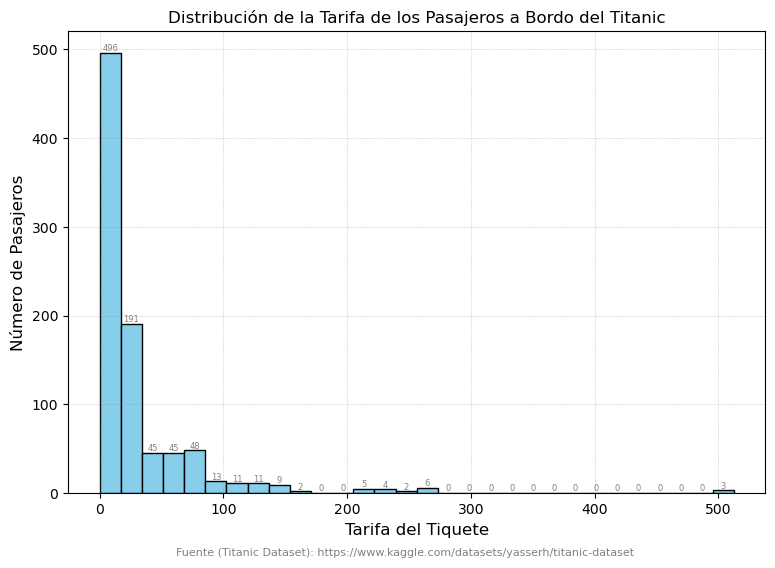

In [31]:
# Configurar la gráfica
plt.figure(figsize=(9, 6))

# Ajustar la apariencia de las cuadrículas
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.4, color='gray')

# Crear el histograma
n, bins, patches = plt.hist(df1['fare'].dropna(), bins=30, edgecolor='black', color='skyblue')

# Añadir los valores de las barras del histograma
for count, bin_edge in zip(n, bins):
    # Anotar el valor en el centro de cada barra
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, f'{int(count)}',
             ha='center', va='bottom', color='gray', fontsize=6)

# Añadir título y etiquetas
plt.title('Distribución de la Tarifa de los Pasajeros a Bordo del Titanic', fontsize=12)
plt.xlabel('Tarifa del Tiquete', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)

# Añadir fuente de los datos
plt.figtext(0.5, 0.01, 'Fuente (Titanic Dataset): https://www.kaggle.com/datasets/yasserh/titanic-dataset',
            ha='center', va='center', fontsize=8, color='gray')

# Mostrar la gráfica
plt.show()

## **✅ 2. Analisis de Grafico: Histograma**

### **⭕️Forma del Histograma**

- **Concentración en el Rango de 0 a 100:**

**Observación:** La mayoría de las barras del histograma son muy altas en el rango de tarifa de 0 a 100.

**Comentario:** Esto indica que la mayoría de los pasajeros pagaron tarifas relativamente bajas. La alta concentración en este rango sugiere que el precio de los tiquetes más comúnmente adquirido era asequible para la mayoría de los pasajeros.

- **Barras Bajas en el Rango de 100 a 300:**

**Observación:** Las barras en el rango de tarifa de 100 a 300 son mucho más bajas.

**Comentario:** Esto muestra que menos pasajeros pagaron tarifas en este rango. A medida que las tarifas aumentan, se observa una menor cantidad de pasajeros, lo que podría reflejar una menor oferta de tiquetes en este rango de precio o una menor demanda.

- **Tarifas Altas (Más de 300):**

**Observación:** Las barras para tarifas superiores a 300 son muy bajas y dispersas.

**Comentario:** Este patrón indica que hay muy pocos pasajeros que pagaron tarifas extremadamente altas. Las tarifas más altas parecen ser excepcionales y no representan la mayoría de los datos, lo que sugiere que los tiquetes de lujo eran relativamente poco usuales.

### **⭕️Dispersión de los Datos**

- **Dispersión General:**

**Observación:** La dispersión de los datos es mayor en los rangos de tarifas más bajas, donde las barras son más altas y más densas. En contraste, en los rangos de tarifas más altas, la dispersión es menor, con barras mucho más bajas y menos concentradas.

**Comentario:** La mayoría de los pasajeros tiene tarifas de tiquete que caen en el rango bajo, mientras que las tarifas más altas tienen una distribución más dispersa y menos frecuente. Esto podría reflejar el hecho de que los tiquetes más caros eran menos comunes y más accesibles solo para una minoría de pasajeros.

### **⭕️Existencia de Datos Atípicos**

- **Datos Atípicos:**

**Observación:** Aunque hay un pequeño número de pasajeros con tarifas extremadamente altas (por encima de 500), estos casos son muy aislados y aparecen como barras casi invisibles en el histograma.

**Comentario:** Estos datos atípicos representan tarifas de tiquetes excepcionalmente altas y podrían ser indicativos de cabinas de lujo o reservas especiales. Dado su bajo número en comparación con las tarifas más comunes, no tienen un impacto significativo en la distribución general, pero son importantes para entender la gama completa de precios de los tiquetes.

## **⚛️3. Proporción de sobrevivientes**
---

1. Represente gráficamente la variable *survived* de la base de datos por medio de un **diagrama de sectores**.
2. Realice un análisis del diagrama de sectores señalando la propoción de pasajeros que sobrevivieron y los que no lo hicieron.

## **✅ 1. Representación grafica (Diagrama de Sectores)**

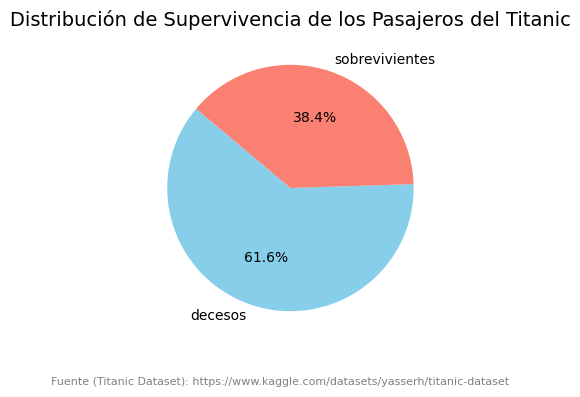

In [33]:
# Contar la cantidad de sobrevivientes y no sobrevivientes
df1['survived'] = df1['survived'].replace({1: 'sobrevivientes', 0: 'decesos'})
survived_counts = df1['survived'].value_counts()

# Configurar el diagrama de sectores
plt.figure(figsize=(8, 4))
plt.pie(survived_counts, labels=survived_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)

# Añadir título y fuente de los datos
plt.title('Distribución de Supervivencia de los Pasajeros del Titanic', fontsize=14)
# Añadir la fuente de los datos en la gráfica
plt.figtext(0.5, 0.01, 'Fuente (Titanic Dataset): https://www.kaggle.com/datasets/yasserh/titanic-dataset',
            ha='center', va='center', fontsize=8, color='gray')

# Mostrar la gráfica
plt.show()

## **✅ 2. Analisis de Grafico: Diagrama de Sectores**

#### ⭕️**Proporción de Pasajeros que Sobrevivieron**
**Proporción:** 38.4%

**Análisis:** Aproximadamente el 38.4% de los pasajeros a bordo del Titanic sobrevivieron al desastre. Esta proporción indica que, a pesar de los esfuerzos de rescate y las medidas de seguridad disponibles, menos de la mitad de los pasajeros lograron sobrevivir. Esto resalta la magnitud de la tragedia y la dificultad de la situación en la que se encontraron los pasajeros durante el hundimiento.

#### ⭕️**Proporción de Pasajeros que No Sobrevivieron**
**Proporción:** 61.6%

**Análisis:** El 61.6% restante de los pasajeros no sobrevivió al hundimiento del Titanic. Esta mayor proporción de decesos refleja la severidad del incidente y la gran cantidad de víctimas que resultaron de la tragedia. La alta tasa de mortalidad sugiere que las circunstancias en el momento del hundimiento fueron extremadamente adversas y que muchas personas no tuvieron la oportunidad de sobrevivir.

#### ⭕️**Conclusión**
La mayoría de los pasajeros, con un 61.6%, no sobrevivió, mientras que un 38.4% logró sobrevivir. Estos porcentajes destacan la naturaleza devastadora del evento y proporcionan una visión significativa de los resultados del desastre del Titanic.

## **⚛️4. Distribución de pasajeros y tripulación**
---
Realice una exploración la distribución de los pasajeros y tripulación, distinguiendo por género y edad, y analizando la relación que estas variables tuvieron con su supervivencia.  

1. Explorar la distribución de edades para mujeres y hombres en dos gráficas. Se deberá representar mediante dos **histogramas** la edad de los pasajeros en dos gráficas en la misma figura, usando para discriminar las distribuciones la variable categórica sexo (**`sex`**)

> * Los diagramas pueden ser construidos como un **`FacetGrid`** de la librería *Seaborn*.

## **✅ 1. Representación grafica (Histogramas)**

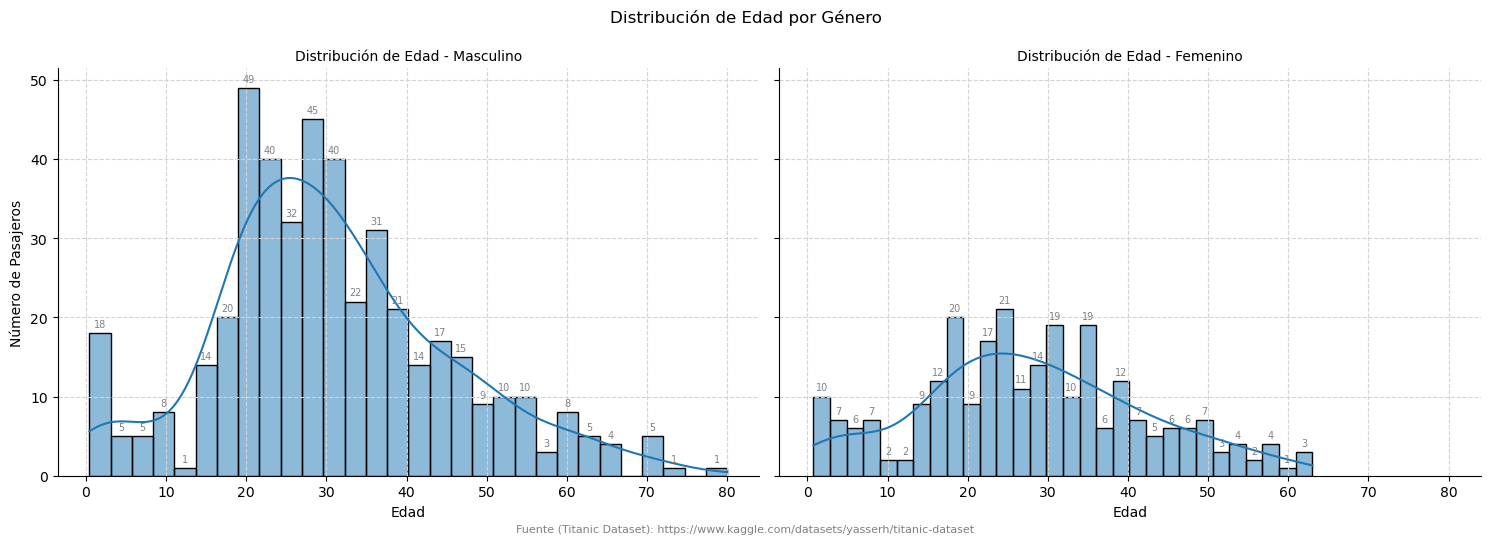

In [34]:
# Reemplazar valores en la columna 'sex'
df1['sex'] = df1['sex'].replace({'male': 'Masculino', 'female': 'Femenino'})

# Configurar el FacetGrid
g = sns.FacetGrid(df1, col="sex", col_wrap=2, height=5, aspect=1.5, sharex=True, sharey=True)
g.map(sns.histplot, 'age', bins=30, kde=True)

# Añadir valores numéricos a las barras
def add_values(ax):
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Solo mostrar valores si la altura es mayor que 0
            ax.annotate(f'{int(height)}',
                        xy=(patch.get_x() + patch.get_width() / 2, height),
                        xytext=(0, 3),  # Desplazamiento del texto
                        textcoords="offset points",
                        ha='center', va='bottom',
                        color='gray',  # Color gris claro
                        fontsize=7)  # Tamaño de fuente 8

# Aplicar la función para añadir valores a cada subgráfico
for ax in g.axes.flat:
    add_values(ax)
    ax.grid(True, linestyle='--', color='lightgray')  # Configurar la cuadrícula con gris suave

# Añadir títulos y etiquetas
g.set_axis_labels('Edad', 'Número de Pasajeros')
g.set_titles('Distribución de Edad - {col_name}')
g.fig.suptitle('Distribución de Edad por Género', y=1.05)

# Añadir la fuente de los datos en la gráfica
plt.figtext(0.5, 0.01, 'Fuente (Titanic Dataset): https://www.kaggle.com/datasets/yasserh/titanic-dataset',
            ha='center', va='center', fontsize=8, color='gray')

# Mostrar la gráfica
plt.show()


## **✅ 2. Analisis de Grafico: Histogramas**

### **⭕️Distribución Edad - Masculino**

**✔️Comportamiento General:** La línea KDE para los hombres muestra que la mayor concentración de edades se encuentra en el rango de 20 a 30 años. En este rango, la altura de la línea KDE es la más alta, indicando que la mayoría de los pasajeros masculinos están en este grupo etario. La altura de la línea KDE en este rango es considerablemente alta, pero no supera los 40 pasajeros en promedio, sugiriendo una densidad relativamente alta de hombres jóvenes a bordo.

**✔️Comportamiento en Edades Avanzadas:** La línea KDE presenta una menor altura en el rango de edades de 70 a 80 años, indicando que hay una menor densidad de pasajeros masculinos en este grupo etario. Esto sugiere que los hombres mayores eran menos numerosos a bordo en comparación con los jóvenes.

**✔️Conclusión:** La distribución de edades para los hombres muestra una concentración significativa en la juventud (20-30 años) con una disminución notable en edades avanzadas. Esta tendencia podría reflejar la composición demográfica y las características de los pasajeros masculinos a bordo del Titanic.

### **⭕️Distribución Edad - Femenino**

**✔️Comportamiento General:** La línea KDE para las mujeres muestra que la mayor concentración de edades también se encuentra en el rango de 20 a 30 años, similar a los hombres. Sin embargo, la altura de la línea KDE en este rango es menor en comparación con la de los hombres, alcanzando en promedio entre 10 y 20 pasajeros. Esto sugiere que, aunque las mujeres también están predominantemente en el rango de 20 a 30 años, su densidad a bordo es menor en comparación con los hombres en el mismo rango de edad.

**✔️Comportamiento en Edades Avanzadas:** La línea KDE muestra una disminución en la altura para las mujeres en el rango de edades de 50 a 70 años, con una menor densidad en comparación con el rango de 20 a 30 años. Este descenso en la densidad de pasajeros femeninos en edades avanzadas es notable, y puede reflejar una menor representación de mujeres en este grupo etario a bordo.

**✔️Conclusión:** La distribución de edades para las mujeres muestra una concentración en el rango de 20 a 30 años, aunque con una densidad menor comparada con los hombres en el mismo rango. La menor representación en edades avanzadas también es evidente, lo que puede indicar diferencias en la composición etaria de las mujeres a bordo en comparación con los hombres.

### **⭕️Conclusión General:**

En resumen, tanto para hombres como para mujeres, la mayor densidad de pasajeros se encuentra en el rango de 20 a 30 años. Sin embargo, la densidad es mayor para los hombres en comparación con las mujeres en este rango etario. Las edades avanzadas tienen una representación menor en ambas categorías

## **⚛️5. Primera, segunda y tercera clase**
---
Cuando ocurre la tragedia, la evacuación se realizó dando prioridad a al registro de clase de los pasajeros. Vamos a explorar la distribución de personas, por edad, que correspondían a cada clase para conocer cómo influyó esto en su supervivencia.

1. Debe representar gráficamente la distribución y medidas de posición de las edades de los pasajeros a bordo del *Titanic* en cada clase utilizando una **diagramas de cajas**.
**`Nota:`** Dado que se tiene tres clases, se espera que una única gráfica que contenga tres diagramas de caja, esto permitirá la respectiva comparación y análisis.

## **✅ 1. Representación grafica (Diagrama de Cajas)**

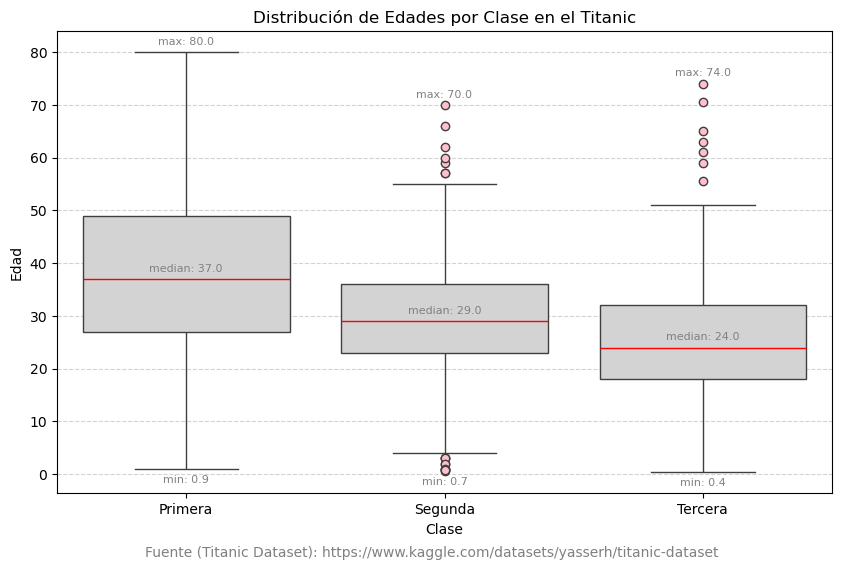

In [35]:
# Calcular las medianas y mínimos de las clases (silenciando la advertencia)
medianas = df1.groupby('class', observed=False)['age'].median()
minimos = df1.groupby('class', observed=False)['age'].min()
maximos = df1.groupby('class', observed=False)['age'].max()

# Configurar la columna 'class' como categórica para asegurar el orden correcto en el gráfico
df1['class'] = df1['class'].replace({'First': 'Primera', 'Second': 'Segunda', 'Third': 'Tercera'})
df1['class'] = df1['class'].astype('category')

# Configurar la gráfica
plt.figure(figsize=(10, 6))

# Crear el diagrama de caja
boxplot = sns.boxplot(
    data=df1,
    x='class',
    y='age',
    boxprops=dict(facecolor='lightgrey'),   # Color de las cajas
    medianprops=dict(color='red'),          # Color de la línea de la mediana
    flierprops=dict(markerfacecolor='pink', marker='o')  # Color de los círculos (valores atípicos)
)

# Añadir los valores de la mediana en la gráfica
for i, median in enumerate(medianas):
    boxplot.text(i, median + 2, f'median: {median:.1f}',
                 ha='center', va='center', color='gray', fontsize=8)

# Añadir los valores de las bases (mínimos) para las clases 1 y 2
for i, minimo in enumerate(minimos):
        boxplot.text(i, minimo - 2, f'min: {minimo:.1f}',
                     ha='center', va='center', color='gray', fontsize=8)

# Añadir los valores de las bases (mínimos) para las clases 1 y 2
for i, maximo in enumerate(maximos):
        boxplot.text(i, maximo + 2, f'max: {maximo:.1f}',
                     ha='center', va='center', color='gray', fontsize=8)


# Añadir cuadrícula de color gris suave
plt.grid(True, linestyle='--', color='lightgrey', axis='y')

# Añadir título y etiquetas
plt.title('Distribución de Edades por Clase en el Titanic')
plt.xlabel('Clase')
plt.ylabel('Edad')

# Añadir la fuente de los datos en la gráfica
plt.figtext(0.5, 0.01, 'Fuente (Titanic Dataset): https://www.kaggle.com/datasets/yasserh/titanic-dataset',
            ha='center', va='center', fontsize=10, color='gray')

# Mostrar la gráfica
plt.show()

## **✅ 2. Analisis de Grafico: Diagrama de Cajas**

### **⭕️ Analisis Medianas por Clase:**

* **Primera Clase:** La mediana es de 37 años. Esto sugiere que la edad central de los pasajeros en primera clase es relativamente alta en comparación con las otras clases. La mediana ligeramente inclinada hacia abajo indica que la distribución tiene una cola menor hacia valores menores.

* **Segunda Clase:** La mediana es de 29 años. La ligera inclinación hacia abajo indica una distribución con una cola menor hacia valores menores en comparación con la primera clase, pero no tan pronunciada como en la primera clase.

* **Tercera Clase:** La mediana es de 24 años, que es la más baja entre las tres clases. También muestra una ligera inclinación hacia abajo, indicando que la mayoría de los valores se concentran hacia edades más jóvenes.

### **⭕️ Intercuartil (Caja) por Clase:**

* **Primera Clase:** El rango intercuartil (IQR) es de aproximadamente 27 a 49 años. Esto indica que la mitad central de los datos está concentrada en un rango de 22 años, mostrando una dispersión moderada.

* **Segunda Clase:** El IQR está entre 23 y 36 años. Esto es un rango de 13 años, sugiriendo una menor dispersión en comparación con la primera clase.

* **Tercera Clase:** El IQR se encuentra entre 19 y 31 años, con un rango de 12 años, que es un rango ligeramente menor comparado con la segunda clase, pero aún indica cierta dispersión en los datos.

### **⭕️ Valores Extremos y Líneas que Salen de la Caja (Bigotes):**

* **Primera Clase:** Los bigotes se extienden desde 0.9 hasta 80 años. Esto muestra una gran dispersión de edades, pero la caja central muestra la mayoría de los datos concentrados.

* **Segunda Clase:** Los bigotes se extienden desde 0.7 hasta 70 años. Similar a la primera clase, pero se logran ver valores extremos hacia arriba y abajo de los Bigotes. La presencia de valores extremos arriba y abajo indican presencia de valores atipicos, porque hay datos alejados de la mayoria de elementos del conjunto de datos.

* **Tercera Clase:** Los bigotes van desde 0.4 hasta 74 años. Los valores extremos están presentes, especialmente hacia los valores altos.

### **⭕️ Relación entre Medianas:**

* La mediana de la segunda clase (29 años) está incluida en el rango intercuartil de la primera clase (27 a 49 años). Esto sugiere que la mayoría de los pasajeros de la segunda clase tienen edades que están bien representadas dentro de la distribución de la primera clase.

* La mediana de la tercera clase (24 años) también está incluida en el rango intercuartil de la segunda clase (23 a 36 años), mostrando que las edades de los pasajeros de tercera clase están completamente dentro del rango de la segunda clase.

* De forma similar, la mediana de la segunda clase (29 años) está incluida en el rango intercuartil de la tercera clase (19 a 31 años), confirmando que la distribución de edades se solapa a través de las clases.

### **⭕️ Conclusión General:**

El análisis del diagrama de cajas revela una clara relación entre las edades de los pasajeros y la clase en la que viajaban. Los pasajeros de la primera clase tienden a ser mayores que los de la segunda y tercera clase, con una mayor dispersión en sus edades. Los pasajeros de la segunda clase tienen una distribución de edades más concentrada, pero sus edades están bien representadas dentro de la primera clase.

## **⚛️6. Medidas de tendencia central**
---
1. Calcular el promedio de edad de los pasajeros del Titanic
2. Calcular la mediana de la edad de los pasajeros del Titanic.
3. Calcular el promedio del costo del tiquete de los pasajeros del Titanic
4. Calcular la mediana del costo de los tiquetes de los padajeros del Titanic.
5. Conformar un **diccionario** con los resultados de los puntos 1, 2, 3 y 4.
6. Comparar la media y mediana de cada una de las variables ¿ Tiene sesgo la distribución de estas variables?

## **✅ Calculos de Promedio y Mediana (Edad, Costo de los tiquetes)**

In [36]:
# Código para calcular las medidas de tendencia central solicitadas

# Calcular el promedio y la mediana de la edad de los pasajeros
mean_age = df1['age'].mean()
median_age = df1['age'].median()

# Calcular el promedio y la mediana del costo del tiquete
mean_fare = df1['fare'].mean()
median_fare = df1['fare'].median()

## **✅ Creación de Diccionario de datos**

In [37]:
# Escriba aquí el código para construir el diccionario solicitado
resultados = {
    'Promedio de Edad': mean_age,
    'Mediana de Edad': median_age,
    'Promedio de Costo de Tiquete': mean_fare,
    'Mediana de Costo de Tiquete': median_fare
}
print(json.dumps(resultados, indent=4))

{
    "Promedio de Edad": 29.69911764705882,
    "Mediana de Edad": 28.0,
    "Promedio de Costo de Tiquete": 32.204207968574636,
    "Mediana de Costo de Tiquete": 14.4542
}


## **✅ Arbol de decisiones ( `Media` vs `Mediana` )**

In [38]:
# Análisis de sesgo
print("Análisis de sesgo:")

# Analisis de Edad:
if mean_age > median_age:
    print(f"Media de Edad: {mean_age} > Mediana de Edad: {median_age} = La distribución de la edad tiene sesgo positivo (asimetría a la derecha).")
elif mean_age < median_age:
    print(f"Media de Edad: {mean_age} < Mediana de Edad: {median_age} = La distribución de la edad tiene sesgo negativo (asimetría a la izquierda).")
else:
    print(f"Media de Edad: {mean_age} = Mediana de Edad: {median_age} = La distribución de la edad no tiene sesgo.")

# Analisis de Costo de Tiquete
if mean_fare > median_fare:
    print(f"Media de Costo Tiquete: {mean_fare} > Mediana de Costo Tiquete: {median_fare} = La distribución del costo del tiquete tiene sesgo positivo (asimetría a la derecha).")
elif mean_fare < median_fare:
    print(f"Media de Costo Tiquete: {mean_fare} < Mediana de Costo Tiquete: {median_fare} = La distribución del costo del tiquete tiene sesgo negativo (asimetría a la izquierda).")
else:
    print(f"Media de Costo Tiquete: {mean_fare} = Mediana de Costo Tiquete: {median_fare} = La distribución del costo del tiquete no tiene sesgo.")

Análisis de sesgo:
Media de Edad: 29.69911764705882 > Mediana de Edad: 28.0 = La distribución de la edad tiene sesgo positivo (asimetría a la derecha).
Media de Costo Tiquete: 32.204207968574636 > Mediana de Costo Tiquete: 14.4542 = La distribución del costo del tiquete tiene sesgo positivo (asimetría a la derecha).


## **✅ Analisis de Sesgo**

| Variable                | Media          | Mediana       | Análisis de Sesgo                                                    |
|-------------------------|----------------|---------------|---------------------------------------------------------------------|
| Edad                    | 29.70          | 28.0          | La distribución de la edad tiene sesgo positivo (asimetría a la derecha). |
| Costo del Tiquete        | 32.20          | 14.4542       | La distribución del costo del tiquete tiene sesgo positivo (asimetría a la derecha). |


## **⚛️7. Medidas de dispersión**
---
1. Para cada una de las categorías de la variable **pclass** calcule la media y desviación estándar de la variable precio del tiquete (fare).
2. Utilizar los datos hallados en la parte 1 para calcular el coeficiente de variación de la variable precio del tiquete (fare) en cada una de las categorías de la variable **pclass**. Comparar y analizar los resultados.

## **✅ 1. Calculo de media y desviación estándar [`pclass` v.s `fare`]**

In [39]:
# Agrupar por 'pclass' y calcular la media y desviación estándar del precio del tiquete ('fare')
fare_stats = df1.groupby('pclass')['fare'].agg(['mean', 'std']).reset_index()

# Calcular el coeficiente de variación (CV = (desviación estándar / media) * 100)
fare_stats['coef_variacion'] = (fare_stats['std'] / fare_stats['mean']) * 100

# Mostrar resultados
print(fare_stats)

   pclass       mean        std  coef_variacion
0       1  84.154687  78.380373       93.138451
1       2  20.662183  13.417399       64.936985
2       3  13.675550  11.778142       86.125542


## **✅ 2. Analisis de datos**

| pclass |      Media     |       Desv. Estandar      | Coef. Variacion |
|--------|---------------|----------------|----------------|
|   1    |  84.154687    |  78.380373     |   93.138451    |
|   2    |  20.662183    |  13.417399     |   64.936985    |
|   3    |  13.675550    |  11.778142     |   86.125542    |


### **⭕️Analisis Primera Clase: ( `pclass = 1` )**

En la primera clase, la media del precio es considerablemente alta en comparación con las demás clases (84.15), lo que es de esperar dado el estatus de los pasajeros de primera clase. Sin embargo, el coeficiente de variación es también elevado (93.14%), lo que indica una gran dispersión en los precios. Esto sugiere que los precios de los tiquetes en esta clase eran muy variables, probablemente reflejando diferentes niveles de lujo o servicios adicionales.

### **⭕️Analisis Segunda Clase: ( `pclass = 2` )**

En la segunda clase, el precio del tiquete es mucho menor que en la primera clase, con una media de 20.66. La desviación estándar también es menor (13.42), y el coeficiente de variación (64.94%) sugiere una menor dispersión en los precios en comparación con la primera clase. Los precios en esta clase son más consistentes, lo que podría indicar una menor variabilidad en el tipo de servicios o la ubicación de los camarotes.

### **⭕️Analisis Tercera Clase: ( `pclass = 3` )**

En la tercera clase, la media del precio es la más baja (13.68), reflejando el acceso a los camarotes más económicos. Sin embargo, el coeficiente de variación es considerablemente alto (86.13%), lo que indica una dispersión notable en los precios. A pesar de ser la clase con los tiquetes más baratos, existía variabilidad en los precios, posiblemente debido a factores como la ubicación de los camarotes dentro del barco o diferentes tarifas para pasajeros de diferentes orígenes.

**¡Felicitaciones!** ¡Muy buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Importelo como archivo HTML.
3. Realice el envío del archivo en la tarea dispuesta en el aula virtual. No olvide escribir los nombres de los integrantes del grupo en el momento de hacer la entrega.


## **Recursos adicionales**
---

Para complemetar sobre el uso de funciones en Python, puede consultar  la [documentación oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), y en especial la [Guía de usuario](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) de *pandas*.

Además, a continuación se presenta una lista de recursos adicionales que le podrán ser de utilidad:


*  [Data vedas - Exploración y preparación de los datos](https://www.datavedas.com/data-exploration-and-preparation/)
*  [Kaggle - Pandas](https://www.kaggle.com/learn/pandas)
*  [CodeCademy - Learn Data Analysis with Pandas](https://www.codecademy.com/learn/data-processing-pandas)

* [*Matplotlib*: Visualization with Python](http://www.matplotlib.org)
* [Matplotlib Gallery - (Ejemplos)](http://matplotlib.org/gallery.html) - Se recomienda revisar la galería y ajustar el código de las visualizaciones requeridas.
* [Nicolas P. Rougier - *Matplotlib* tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)
* [IBM (Coursera) - Data Visualization with *Python*](https://www.coursera.org/learn/python-for-data-visualization)
* [DataCamp - Introduction to Data Visualization with *Matplotlib*](https://www.datacamp.com/courses/introduction-to-matplotlib)